In [ ]:
## Hypothesis Testing

### 1. Hypothesis Definitions

In this project, we test three main hypotheses about the relationship between startup characteristics and funding:

---

**Hypothesis 1 – Founder Count vs Funding Amount**

- **Research Question (RQ1):**  
  Is there a relationship between a startup’s number of founders and the total amount of funding it receives?

- **Null Hypothesis (H₀₁):**  
  There is no statistically significant linear correlation between the number of founders (`founder_count`) and the (log-transformed) funding amount (`log_amount`).

- **Alternative Hypothesis (H₁₁):**  
  There is a statistically significant linear correlation between the number of founders and the (log-transformed) funding amount.

We will test this using the **Pearson correlation coefficient** between `founder_count` and `log_amount`.

---

**Hypothesis 2 – Funding Stage vs Funding Amount**

- **Research Question (RQ2):**  
  Is there a difference in typical funding amounts across different funding stages (e.g., Pre-seed, Seed, Series A–F)?

- **Null Hypothesis (H₀₂):**  
  All funding stages have the same mean log funding amount:
  \[
    \mu_{\text{Pre-seed}} = \mu_{\text{Seed}} = \mu_{\text{Series A}} = \dots
  \]

- **Alternative Hypothesis (H₁₂):**  
  At least one funding stage has a different mean log funding amount.

We test this using a **one-way ANOVA** on `log_amount` across funding stages with enough observations.

---

**Hypothesis 3 – Founded Year vs Funding Amount**

- **Research Question (RQ3):**  
  Is there a relationship between the year a startup was founded and how much funding it has raised?

- **Null Hypothesis (H₀₃):**  
  There is no statistically significant linear correlation between founding year (`Founded_year`) and the (log-transformed) funding amount.

- **Alternative Hypothesis (H₁₃):**  
  There is a statistically significant linear correlation between founding year and the (log-transformed) funding amount.

Again, we use the **Pearson correlation coefficient** between `Founded_year` and `log_amount`.


In [ ]:
### 2. Load the Data

In [2]:
import pandas as pd
import numpy as np

# Load the cleaned analysis dataset (created in EDA)
df_clean = pd.read_csv("startupdataset_clean_for_analysis.csv")

# Make sure the engineered features exist (re-create if missing)

# log_amount
if "log_amount" not in df_clean.columns and "Amount_clean" in df_clean.columns:
    df_clean["log_amount"] = np.log10(df_clean["Amount_clean"] + 1)

# Founded_year
if "Founded_year" not in df_clean.columns and "Founded" in df_clean.columns:
    df_clean["Founded_year"] = pd.to_numeric(df_clean["Founded"], errors="coerce")

print("Columns in df_clean:")
print(df_clean.columns)

print("\nData Overview:")
cols_to_show = [c for c in ["Company/Brand", "founder_count", "Amount_clean", "log_amount", "Stage", "Founded_year"]
                if c in df_clean.columns]
print(df_clean[cols_to_show].head())

print("\nInfo (key numeric columns):")
print(df_clean[["founder_count", "Amount_clean", "log_amount", "Founded_year"]].info())


Columns in df_clean:
Index(['Company/Brand', 'Founded', 'Headquarters', 'Sector', 'What it does',
       'Founder/s', 'Investor/s', 'Amount(in dollars)', 'Stage', 'Month',
       'founder_count', 'Amount_clean', 'log_amount', 'Founded_year'],
      dtype='object')

Data Overview:
  Company/Brand  founder_count  Amount_clean  log_amount     Stage  \
0  CollegeDekho              1    35000000.0    7.544068  Series B   
1         Simpl              2    40000000.0    7.602060  Series B   
2     PayGlocal              3     4900000.0    6.690196  Series A   
3     Pocket FM              3    22000000.0    7.342423  Series B   
4   PlanetSpark              2    13000000.0    7.113943  Series B   

   Founded_year  
0        2015.0  
1        2015.0  
2        2021.0  
3        2018.0  
4        2017.0  

Info (key numeric columns):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------  

In [ ]:
### 3. Hypothesis 1 – Founder Count vs Funding Amount

#### 3.1 Exploratory Visualization

Before running the statistical test, we create a scatterplot of `founder_count` vs `log_amount` to visually check whether a linear trend is plausible.

If the cloud of points suggests that higher founder counts are associated with higher (or lower) log funding, Pearson correlation is an appropriate way to quantify this relationship.


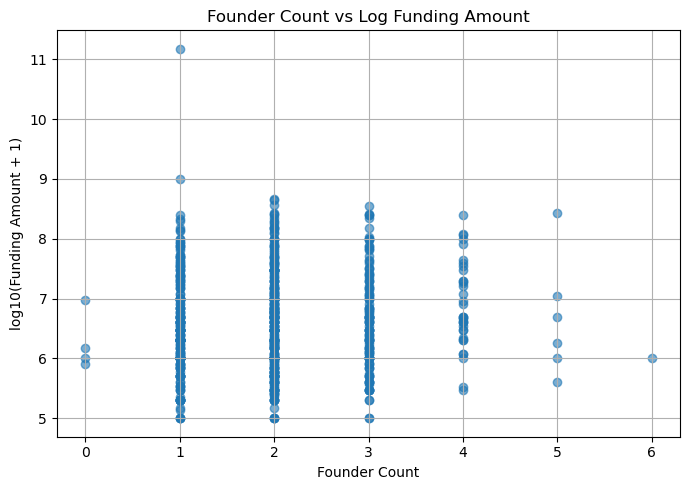

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(df_clean["founder_count"], df_clean["log_amount"], alpha=0.6)
plt.title("Founder Count vs Log Funding Amount")
plt.xlabel("Founder Count")
plt.ylabel("log10(Funding Amount + 1)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#### 3.2 Pearson Correlation Test

We now compute the **Pearson correlation coefficient** (r) and the p-value between:

- `founder_count`
- `log_amount`

Pearson’s r measures the strength and direction of a linear relationship:

- r > 0 → positive linear association  
- r < 0 → negative linear association  
- r ≈ 0 → little or no linear association  


In [4]:
from scipy.stats import pearsonr

# Drop missing values in the two variables
df_corr1 = df_clean.dropna(subset=["founder_count", "log_amount"])

r1, p1 = pearsonr(df_corr1["founder_count"], df_corr1["log_amount"])
n1 = df_corr1.shape[0]
dfree1 = n1 - 2

print(f"Hypothesis 1 – Founder Count vs Log Funding")
print(f"Pearson r: {r1:.4f}")
print(f"p-value : {p1:.4f}")
print(f"Degrees of Freedom: {dfree1}")


Hypothesis 1 – Founder Count vs Log Funding
Pearson r: 0.0712
p-value : 0.0607
Degrees of Freedom: 693


In [ ]:
#### 3.3 Interpretation (Hypothesis 1)

The Pearson correlation between `founder_count` and `log_amount` is:

- r ≈ **0.0712**  
- p ≈ **0.0607**

At the conventional significance level of α = 0.05, the p-value is **slightly above** the threshold, so we **fail to reject the null hypothesis H₀₁**. The correlation coefficient is also very close to zero, indicating **no meaningful linear relationship** between the number of founders and the (log-transformed) funding amount in this dataset.
In other words, based on this data, we do **not** find strong evidence that startups with more founders systematically raise higher (or lower) funding amounts.


In [ ]:
### 4. Hypothesis 2 – Funding Stage vs Funding Amount

#### 4.1 Exploratory Visualization

For this hypothesis, the predictor is categorical (`Stage`), and the outcome is numeric (`log_amount`).  
We first visualize the distributions of log funding across stages using boxplots. This helps us see whether some stages (e.g., Series C–F) systematically have higher funding levels than early stages (pre-seed, seed).


Stages used in ANOVA and boxplot (n >= 5):
Index(['Seed', 'Pre-series A', 'Series A', 'Series B', 'Series C', 'Pre-seed',
       'Debt', 'Series D', 'Series E', 'Pre-series B', 'Pre-Series A',
       'Series F'],
      dtype='object', name='Stage')


<Figure size 800x400 with 0 Axes>

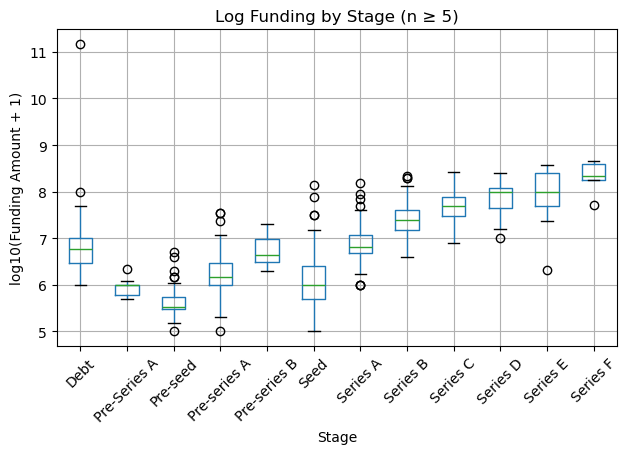

In [5]:
# Keep only rows with non-missing Stage and log_amount
df_stage = df_clean.dropna(subset=["Stage", "log_amount"]).copy()

# Optionally restrict to stages with at least 5 observations (more stable)
stage_counts = df_stage["Stage"].value_counts()
common_stages = stage_counts[stage_counts >= 5].index
df_stage_common = df_stage[df_stage["Stage"].isin(common_stages)].copy()

print("Stages used in ANOVA and boxplot (n >= 5):")
print(common_stages)

plt.figure(figsize=(8, 4))
df_stage_common.boxplot(column="log_amount", by="Stage", rot=45)
plt.ylabel("log10(Funding Amount + 1)")
plt.title("Log Funding by Stage (n ≥ 5)")
plt.suptitle("")
plt.tight_layout()
plt.show()


In [ ]:
#### 4.2 One-way ANOVA

To formally test whether mean log funding differs across stages, we use a **one-way ANOVA**:

- **Null Hypothesis (H₀₂):** All stages have the same mean log funding.  
- **Alternative Hypothesis (H₁₂):** At least one stage has a different mean log funding.

ANOVA compares the variability between group means to the variability within groups.  
A large F-statistic with a small p-value indicates that not all group means are equal.


In [6]:
from scipy.stats import f_oneway

# Build a list of log_amount arrays, one for each stage
groups = [group["log_amount"].values for _, group in df_stage_common.groupby("Stage")]

F_stat, p2 = f_oneway(*groups)

print("Hypothesis 2 – Stage vs Log Funding (One-way ANOVA)")
print(f"F-statistic: {F_stat:.4f}")
print(f"p-value    : {p2:.4f}")
print(f"Number of groups (stages): {len(groups)}")


Hypothesis 2 – Stage vs Log Funding (One-way ANOVA)
F-statistic: 118.0945
p-value    : 0.0000
Number of groups (stages): 12


In [ ]:
#### 4.3 Interpretation (Hypothesis 2)

For Hypothesis 2 (Stage vs Log Funding), the one-way ANOVA results are:

- F-statistic ≈ 118.09  
- p-value ≪ 0.001 (printed as 0.0000 due to rounding)  
- 12 funding stages included in the test

The F-statistic is very large and the p-value is extremely small, so we **reject the null hypothesis H₀₂**. This means that the mean log funding amount is **not the same** across all funding stages.

In other words, funding stage is strongly associated with funding size: later stages (e.g., Series B–F) tend to have systematically higher log funding levels than early stages (pre-seed, seed, etc.), which is also consistent with the boxplot patterns observed in the EDA.


In [ ]:
### 5. Hypothesis 3 – Founded Year vs Funding Amount

#### 5.1 Exploratory Visualization

Here we examine whether startups founded more recently tend to raise more funding.

We first create a scatterplot of `Founded_year` vs `log_amount` to see if newer (higher year) startups tend to cluster at higher funding values.


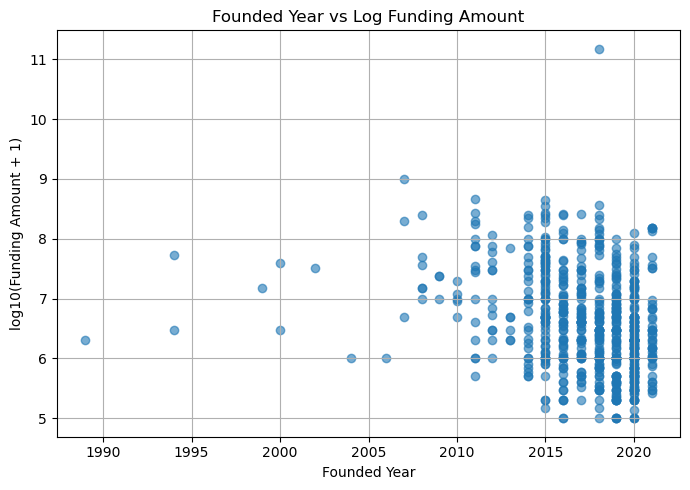

In [7]:
plt.figure(figsize=(7, 5))
df_year = df_clean.dropna(subset=["Founded_year", "log_amount"]).copy()

plt.scatter(df_year["Founded_year"], df_year["log_amount"], alpha=0.6)
plt.title("Founded Year vs Log Funding Amount")
plt.xlabel("Founded Year")
plt.ylabel("log10(Funding Amount + 1)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#### 5.2 Pearson Correlation Test

We again use the Pearson correlation coefficient to quantify the linear relationship between:

- `Founded_year`
- `log_amount`


In [8]:
from scipy.stats import pearsonr

df_corr3 = df_year.dropna(subset=["Founded_year", "log_amount"])

r3, p3 = pearsonr(df_corr3["Founded_year"], df_corr3["log_amount"])
n3 = df_corr3.shape[0]
dfree3 = n3 - 2

print("Hypothesis 3 – Founded Year vs Log Funding")
print(f"Pearson r: {r3:.4f}")
print(f"p-value : {p3:.4f}")
print(f"Degrees of Freedom: {dfree3}")


Hypothesis 3 – Founded Year vs Log Funding
Pearson r: -0.2865
p-value : 0.0000
Degrees of Freedom: 692


In [ ]:
#### 5.3 Interpretation (Hypothesis 3)

For Hypothesis 3 (Founded Year vs Log Funding), the Pearson correlation results are:

- r ≈ -0.2865  
- p ≪ 0.001 (printed as 0.0000 due to rounding)  
- df = 692  

The p-value is far below the significance level α = 0.05, so we **reject the null hypothesis H₀₃**. This means that there is a **statistically significant linear relationship** between founding year and log funding.

The correlation is **negative and of weak-to-moderate magnitude**, which implies that more recently founded startups (higher `Founded_year`) tend, on average, to have **slightly lower log funding levels** than older startups in this dataset. In other words, older startups are more likely to have accumulated higher total funding.

However, the effect size (|r| ≈ 0.29) is not very large, so founding year alone does **not** fully determine funding; many other factors (sector, geography, business model, etc.) are likely to play an important role.


In [ ]:
### 6. Summary of Hypothesis Testing

In this section, we tested three hypotheses about the relationship between founder characteristics, funding stage, founding year, and startup funding amounts (log-transformed).

---

**Hypothesis 1 – Founder Count vs Funding Amount**

- Test: Pearson correlation between `founder_count` and `log_amount`
- Result: r ≈ 0.0712, p ≈ 0.0607  
- Interpretation: At α = 0.05, the p-value is slightly above the threshold, so we **fail to reject H₀₁**.  
  The correlation is very close to zero, indicating **no meaningful linear relationship** between the number of founders and the log funding amount in this dataset.  
  In other words, startups with more founders do **not** systematically raise higher (or lower) funding.

---

**Hypothesis 2 – Funding Stage vs Funding Amount**

- Test: One-way ANOVA on `log_amount` across `Stage` (12 stages, n ≥ 5 per stage)
- Result: F ≈ 118.09, p ≪ 0.001 (printed as 0.0000)  
- Interpretation: The F-statistic is very large and the p-value is extremely small, so we **reject H₀₂**.  
  This provides strong evidence that **mean log funding differs across funding stages**.  
  Combined with the boxplots, this supports the idea that later-stage rounds (e.g., Series B–F) tend to be **substantially larger** than early-stage rounds (pre-seed, seed, etc.).

---

**Hypothesis 3 – Founded Year vs Funding Amount**

- Test: Pearson correlation between `Founded_year` and `log_amount`
- Result: r ≈ -0.2865, p ≪ 0.001 (printed as 0.0000), df = 692  
- Interpretation: The p-value is far below 0.05, so we **reject H₀₃** and conclude there is a statistically significant linear relationship between founding year and log funding.  
  The correlation is **negative and weak-to-moderate** in magnitude, suggesting that more recently founded startups tend, on average, to have **slightly lower log funding** than older startups in this dataset.  
  However, the effect size is not very large, so founding year alone does not fully determine funding outcomes.

---

**Overall Conclusion**

Across the three hypotheses:

- **Founder count** does *not* show a strong or significant linear effect on funding.  
- **Funding stage** is *strongly* associated with funding size and clearly separates early vs late funding rounds.  
- **Founding year** shows a statistically significant but modest negative relationship with funding, indicating that older startups have, on average, accumulated higher funding than younger ones.

These results highlight that **where a startup is in the funding lifecycle (stage)** matters much more for funding amounts than **how many founders it has**, while **time in the market (age)** also plays a smaller but detectable role.
